In [69]:
import json
import numpy as np
from Necessary_functions import *



file_name = "MgH_data_qedfci_pqed_pqed_minimal.json"
# Load the molecule data from the JSON file
with open(file_name, 'r') as json_file:
    molecule_data = json.load(json_file)


# Extract values from the loaded JSON data into Python variables
molecule_name = molecule_data["molecule_data"]["molecule_name"]
mA_au = molecule_data["molecule_data"]["mA_au"]
mB_au = molecule_data["molecule_data"]["mB_au"]
mu_au = molecule_data["molecule_data"]["mu_au"]
bondlength_scan_vals = np.array(molecule_data["molecule_data"]["bondlength_scan_vals"])
omega = molecule_data["molecule_data"]["omega"]
CI_Level = molecule_data["molecule_data"]["CI_Level"]
n_photon_basis_states = molecule_data["molecule_data"]["n_photon_basis_states"]
basis_set = molecule_data["molecule_data"]["basis_set"]
ci_info = molecule_data["molecule_data"]["ci_info"]
pqed_info = molecule_data["molecule_data"]["pqed_info"]
pqed_minimal_info = molecule_data["molecule_data"]["pqed_minimal_info"]
lambda_values = np.array(molecule_data["lambda_values"])
qed_ci = np.array(molecule_data["qed-ci"])
pqed_minimal = np.array(molecule_data["pqed_minimal"])
pqed = np.array(molecule_data["pqed_data"])

ci_lp_index = ci_info["lower_polariton_index"]
ci_up_index = ci_info["upper_polariton_index"]

pqed_lp_index = pqed_info["lower_polariton_index"]
pqed_up_index = pqed_info["upper_polariton_index"]

pqed_minimal_lp_index = pqed_minimal_info["lower_polariton_index"]
pqed_minimal_up_index = pqed_minimal_info["upper_polariton_index"]


# Print the extracted variables
print("Molecule Name:", molecule_name)
print("Mass A (au):", mA_au)
print("Mass B (au):", mB_au)
print("Reduced Mass (mu_au):", mu_au)
print("Bond Length Scan Values:", bondlength_scan_vals)
print("Omega:", omega)
print("CI Level:", CI_Level)
print("Number of Photon Basis States:", n_photon_basis_states)
print("Basis Set:", basis_set)
print("CI Info:", ci_info)
print("PQED Info:", pqed_info)
print("PQED Minimal Info:", pqed_minimal_info)
print("Lambda Values:", lambda_values)
print("QED-CASCI:", qed_ci)
print("PQED Minimal:", pqed_minimal)



Molecule Name: MgH
Mass A (au): 1837.1527318119486
Mass B (au): 43722.058360434705
Reduced Mass (mu_au): 1763.0704534079116
Bond Length Scan Values: [1.    1.025 1.051 1.076 1.101 1.126 1.152 1.177 1.202 1.227 1.253 1.278
 1.303 1.328 1.354 1.379 1.404 1.429 1.455 1.48  1.505 1.53  1.556 1.581
 1.606 1.631 1.657 1.682 1.707 1.732 1.758 1.783 1.808 1.833 1.859 1.884
 1.909 1.934 1.96  1.985 2.01  2.035 2.061 2.086 2.111 2.136 2.162 2.187
 2.212 2.237 2.263 2.288 2.313 2.338 2.364 2.389 2.414 2.439 2.465 2.49
 2.515 2.54  2.566 2.591 2.616 2.641 2.667 2.692 2.717 2.742 2.768 2.793
 2.818 2.843 2.869 2.894 2.919 2.944 2.97  2.995 3.02  3.045 3.071 3.096
 3.121 3.146 3.172 3.197 3.222 3.247 3.273 3.298 3.323 3.348 3.374 3.399
 3.424 3.449 3.475 3.5  ]
Omega: 0.136
CI Level: fci
Number of Photon Basis States: 10
Basis Set: cc-pvtz
CI Info: {'upper_polariton_index': 3, 'lower_polariton_index': 1}
PQED Info: {'num_electronic_states': 100, 'num_photonic_states': 10, 'upper_polariton_index': 3,

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


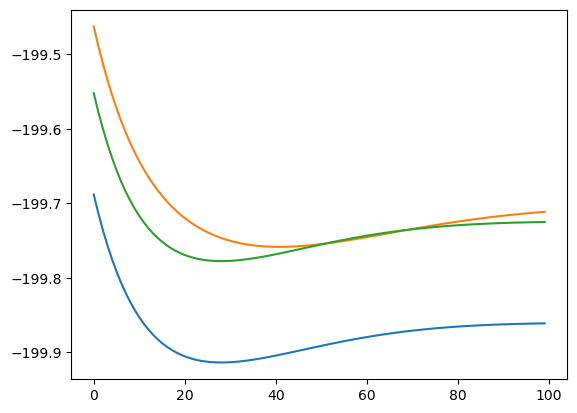

In [70]:
with open("Uncoupled_molecules_data.json", 'r') as json_file:
    molecule_data_uncoupled_1_photon = json.load(json_file)
molecule_name = file_name.split('_')[0]
molecule_data_uncoupled_1_photon = np.array(molecule_data_uncoupled_1_photon[molecule_name]["Uncoupled_Surfaces"])
plt.plot(molecule_data_uncoupled_1_photon)

#fit in the data into pqed minimal, pqed , qed-ci, 

no_coupling_pqed = np.zeros_like(pqed[0])
no_coupling_pqed[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_pqed[:, pqed_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_pqed[:, pqed_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

pqed= pqed.tolist()
pqed.insert(0, no_coupling_pqed.tolist())  
pqed = np.array(pqed)




no_coupling_pqed = np.zeros_like(pqed_minimal[0])
no_coupling_pqed[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_pqed[:, pqed_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_pqed[:, pqed_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

pqed_minimal= pqed_minimal.tolist()
pqed_minimal.insert(0, no_coupling_pqed.tolist())  
pqed_minimal = np.array(pqed_minimal)


no_coupling_qed_ci= np.zeros_like(qed_ci[0])
no_coupling_qed_ci[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_qed_ci[:, pqed_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_qed_ci[:, pqed_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

qed_ci= qed_ci.tolist()
qed_ci.insert(0, no_coupling_qed_ci.tolist())  
qed_ci= np.array(qed_ci)

lambda_values = lambda_values.tolist()
lambda_values.insert(0, 0.0)
lambda_values = np.array(lambda_values)
print(lambda_values)


In [71]:
#calculate Huang Rhys, FC-Limit between S0 and LP and S0 and UP


np.set_printoptions(precision = 3)
fcf_limit_s0_lp_ci = []
fcf_limit_s0_up_ci = []

fcf_limit_s0_lp_pqed = []
fcf_limit_s0_up_pqed = []

fcf_limit_s0_lp_pqed_minimal = []
fcf_limit_s0_up_pqed_minimal = []




HRs_S0_lp_ci =[]
HRs_S0_up_ci = []

HRs_S0_lp_pqed =[]
HRs_S0_up_pqed= []

HRs_S0_lp_pqed_minimal =[]
HRs_S0_up_pqed_minimal = []



index_pes = 0


for lambda_val in lambda_values:


    #s0 to LP
    fcf_s0_lp = get_fcf_matrix(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_ci.append(fcf_s0_lp[0,0])
    fcf_limit_s0_up_ci.append(fcf_s0_up[0,0])

    fcf_s0_lp = get_fcf_matrix(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_pqed.append(fcf_s0_lp[0,0])
    fcf_limit_s0_up_pqed.append(fcf_s0_up[0,0])

    fcf_s0_lp = get_fcf_matrix(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_pqed_minimal.append(fcf_s0_lp[0,0])
    fcf_limit_s0_up_pqed_minimal.append(fcf_s0_up[0,0])



        #s0 to LP
    
    HRs_S0_lp_ci.append(calculate_HR(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_ci.append(calculate_HR(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

    HRs_S0_lp_pqed.append(calculate_HR(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_pqed.append(calculate_HR(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

    HRs_S0_lp_pqed_minimal.append(calculate_HR(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_pqed_minimal.append(calculate_HR(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))


    index_pes+=1

fcf_limit_s0_lp_ci = np.array(fcf_limit_s0_lp_ci)
fcf_limit_s0_up_ci =np.array(fcf_limit_s0_up_ci)

fcf_limit_s0_lp_pqed = np.array(fcf_limit_s0_lp_pqed)
fcf_limit_s0_up_pqed = np.array(fcf_limit_s0_up_pqed)

fcf_limit_s0_lp_pqed_minimal = np.array(fcf_limit_s0_lp_pqed_minimal )
fcf_limit_s0_up_pqed_minimal = np.array(fcf_limit_s0_up_pqed_minimal)


HRs_S0_lp_ci =np.array(HRs_S0_lp_ci )
HRs_S0_up_ci = np.array(HRs_S0_up_ci)

HRs_S0_lp_pqed =np.array(HRs_S0_lp_pqed)
HRs_S0_up_pqed= np.array(HRs_S0_up_pqed)

HRs_S0_lp_pqed_minimal =np.array(HRs_S0_lp_pqed_minimal)
HRs_S0_up_pqed_minimal = np.array(HRs_S0_up_pqed_minimal )


# plt.plot(fcf_limit_s0_lp_ci)
# plt.plot(fcf_limit_s0_lp_pqed)
# plt.plot(fcf_limit_s0_lp_pqed_minimal)
# plt.plot(fcf_limit_s0_up_ci)
# plt.plot(fcf_limit_s0_up_pqed)
# plt.plot(fcf_limit_s0_up_pqed_minimal)
# plt.show()


# plt.plot(HRs_S0_up_pqed_minimal)
# plt.plot(HRs_S0_lp_pqed_minimal)
# plt.plot(HRs_S0_up_pqed)
# plt.plot(HRs_S0_lp_pqed)
# plt.plot(HRs_S0_up_ci)
# plt.plot(HRs_S0_lp_ci)
# plt.show()


S second way  0.0
S second way  2.169606869304938
S second way  0.0
S second way  2.169606869304938
S second way  0.0
S second way  2.169606869304938
S second way  0.001377789185303799
S second way  1.6180483080150405
S second way  0.0013776616145981075
S second way  1.617898491507045
S second way  0.0013776121131028336
S second way  1.6142108798650248
S second way  0.018421494893155893
S second way  1.225973448221802
S second way  0.01880438655614019
S second way  1.225519170494979
S second way  0.020401247181384394
S second way  1.2095899453842753
S second way  0.06852414028811535
S second way  0.9997600247518225
S second way  0.069971688659767
S second way  0.9989258451673028
S second way  0.08257432350218033
S second way  0.9674528002726706
S second way  0.13986216994211395
S second way  0.8409674668353305
S second way  0.14396788972372604
S second way  0.8370966564596877
S second way  0.18688980062863705
S second way  0.7953308125541907
S second way  0.21115443367088302
S second w

[np.int64(0), np.int64(5), np.int64(10)]


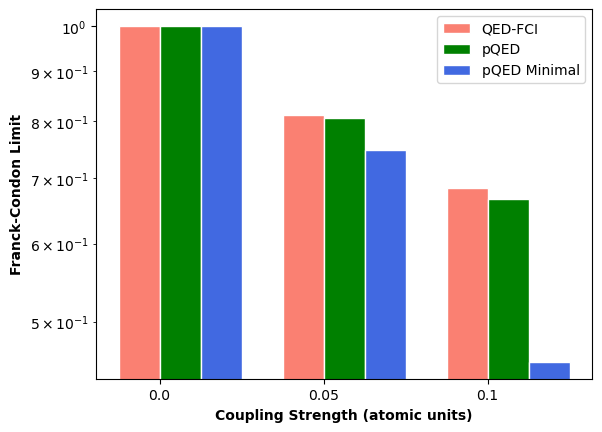

[np.int64(0), np.int64(5), np.int64(10)]


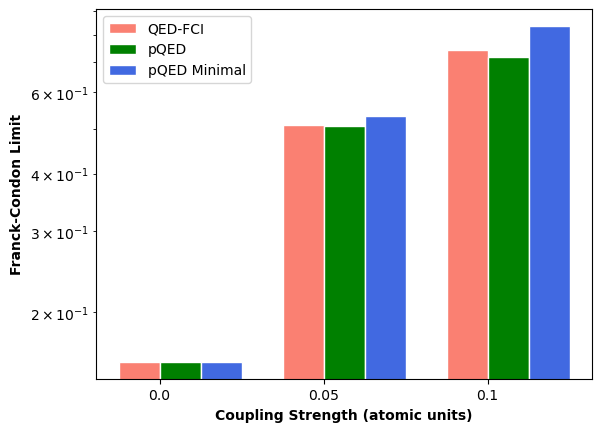

In [72]:
# prompt: I want to create a bar graph of the Franck-Condon limit data shown above against the field coupling strength.  I would like each data set of the Franck-Condon limits to be represented by a separate bar with a distinct shadded color and label.


CICOLOUR = "salmon"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()


# prompt: I want to create a bar graph of the Franck-Condon limit data shown above against the field coupling strength.  I would like each data set of the Franck-Condon limits to be represented by a separate bar with a distinct shadded color and label.


CICOLOUR = "salmon"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()

[np.int64(1), np.int64(5), np.int64(10)]


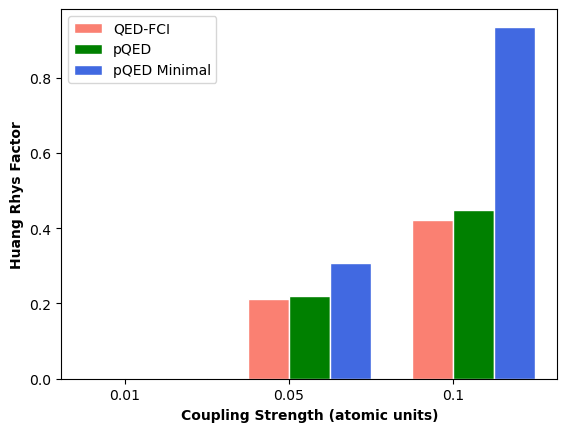

[np.int64(1), np.int64(5), np.int64(10)]


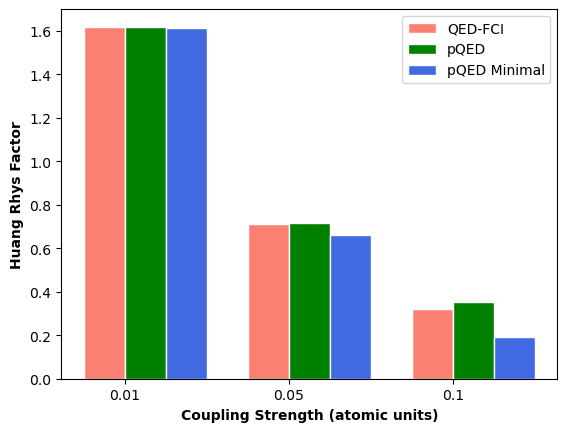

In [73]:


CICOLOUR = "salmon"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
HR_qedci = HRs_S0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed = HRs_S0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed_minimal = HRs_S0_lp_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, HR_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, HR_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, HR_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Huang Rhys Factor', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
#plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()




CICOLOUR = "salmon"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
HR_qedci = HRs_S0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed = HRs_S0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed_minimal = HRs_S0_up_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, HR_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, HR_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, HR_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Huang Rhys Factor', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
#plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()

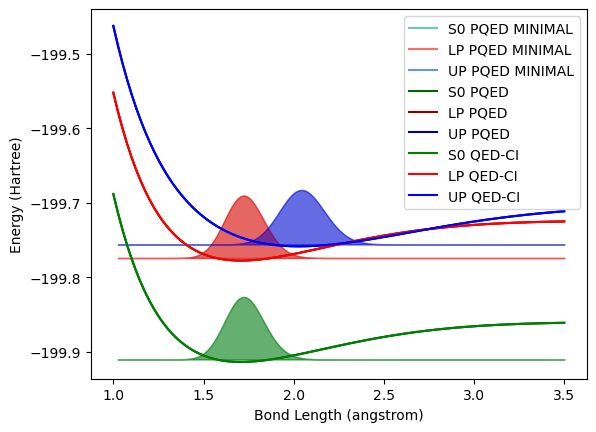

In [74]:
lighter_blue = '#ADD8E6'  # Light Blue
lighter_green = '#90EE90'  # Light Green
lighter_red = '#FFCCCB'  # Light Red (Pale Red)
lighter_blue = '#6495ED'  # Darker Blue
lighter_green = '#66CDAA'  # Darker Green
lighter_red = '#FF6F61'  # Darker Red


#change surface index here
surface_index = 0

# Your data loading and processing code

plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  0 ] , label = "S0 PQED MINIMAL", color=lighter_green)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_lp_index ] , label = "LP PQED MINIMAL", color=lighter_red)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_up_index], label = "UP PQED MINIMAL", color=lighter_blue)



# Plot PQED and QED-CI surfaces as you did before
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  0 ] , label = "S0 PQED", color='darkgreen')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_lp_index ] , label = "LP PQED", color='darkred')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_up_index], label = "UP PQED", color='darkblue')


plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  0], label = "S0 QED-CI", color='green')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:, ci_lp_index ], label = "LP QED-CI", color='red')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  ci_up_index ], label = "UP QED-CI", color='blue')

#get min and max for scaling vib wavefunctions; 

max_val = np.max(qed_ci[surface_index][:,  ci_up_index])
min_val = np.min(qed_ci[surface_index][:,  0 ])
diff = max_val - min_val


r_data = bondlength_scan_vals

# Define how many vibrational wavefunctions to plot
num_vibs_to_plot = 1

# Use spline interpolation to smooth the wavefunctions
spline_r_data = np.linspace(r_data[1], r_data[-1], 1000)



r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color=lighter_green, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color=lighter_red, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color=lighter_blue, alpha=0.3)







r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color='darkgreen', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color='darkred', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='darkblue', alpha=0.3)






r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,   ci_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,ci_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Similarly, plot and fill for the decluttered surfaces
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 QED-CI (with some alpha for transparency)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i] , color='green', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP QED-CI
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i],  np.ones_like(spline_r_data) *lp_vals[i],color='red', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP QED-CI
    plt.fill_between(spline_r_data, (up_wavefunction**2 * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='blue', alpha=0.3)

# # Display the legend and show the plot
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bond Length (angstrom)")
plt.legend()
plt.show()